<a href="https://colab.research.google.com/github/VictorV1ana/Estudo-Airbnb/blob/master/Analisando_os_Dados_do_Airbnb_Vancouver_VictorViana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Vancouver

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa possível.

No início de 2019, a Startup fundada 12 anos atrás, já havia **hospedado mais de 500 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Vancouver, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
  Todos os dados usados foram retirados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).
  
  Para a análise exploratória inicial será apenas utilizado o seguinte arquivo:
  
  * `listings.csv` - *Summary information and metrics for listings in Vancouver (good for visualisations).*


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/bc/vancouver/2019-11-09/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Número de identificação do imóvel 
* `name` - Nome da propriedade no airbnb 
* `hots_name` - Nome do Anfitrião 
* `neighbourhood_group` - esta coluno não tem nenhum valor válido 
* `neighbourhood` - Nome do Bairro
* `latitude` - Latitude do imóvel 
* `longitude` - Longitude do imóvel 
* `room_type` - Tipo da acomodação 
* `price` - Preço 
* `minimum_nights` - Número mínimo de dias da hospedagem
* `number_of_reviews` - Número de reviews que a propriedade possui
* `last_review` - Data do último review 
* `calculated_host_listings_cout` - Quantidade de imóveis que o anfitrião tem no aibnb
* `availability_365` - Número de dias disponíveis para hospedágem dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10080,D1 - Million Dollar View 2 BR,30899,Rami,NaN,Downtown,49.28772,-123.12110,Entire home/apt,151,60,16,2017-02-26,0.16,43,311
1,13188,Garden level studio in ideal loc.,51466,Family Guns,NaN,Riley Park,49.24577,-123.10516,Entire home/apt,120,2,225,2019-10-22,1.90,1,183
2,13357,! Wow! 2bed 2bath 1bed den Harbour View Apartm...,52118,Liliana,NaN,Downtown Eastside,49.27955,-123.10546,Entire home/apt,152,30,57,2019-06-30,0.48,3,316
3,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25550,-123.06696,Entire home/apt,145,30,84,2019-09-14,0.82,1,296
4,14267,EcoLoft Vancouver,56030,Peter & Alison,NaN,Kensington-Cedar Cottage,49.24974,-123.08108,Entire home/apt,140,2,31,2018-07-08,0.28,1,0


### **Q1 - Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos identificar quantas entradas temos na nossa Base de dados e os tipos de variáveis que se encontram em cada coluna.

O *dataset* que estamos utilizando é uma versão resumida do Airbnb. Na mesma página que baixamos o `listings.cvs`, há uma versão completa (`listings.csv.gz`) que possui mais entradas e variáveis para serem analisadas.

In [0]:
# identificar o volume de dados do DataFrame
df.shape
# verificar as 5 primeiras entradas do dataset
print("Variáveis: {}".format(df.shape[0]))
print("Entradas: {}".format(df.shape[1]))
#verificar o tipo das variáveis 
display(df.dtypes)

Variáveis: 6181
Entradas: 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2 - Qual a porcentagem de valores ausentes no *dataset*?**
A quantidade de valores nulos esta diretamente ligada a qualidade do dataset. 
Assim, é importante ter conhecimento se os valores núlos são significativos comparados ao total de entradas.

Nesse sentido, iremos descobrir qual é a porcentagem de valores nulos em relação ao total das entradas.




In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.133150
last_review                       0.133150
host_name                         0.000971
name                              0.000162
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* É possível observar que a coluna `neighbourhood_group` possui 100% dos seu valores faltantes.
* As variáveis `reviews_per_mounth`  e `lats_review` cerca de 13% dos seus valores ausentes.
* As outras colunas estão completas ou possuem uma porcentagem pequena de valores faltantes. 



### **Q3 - Qual o tipo de distribuição das variáveis?** 
Para verificar a distribuição das variáveis, irei plotar o histograma.

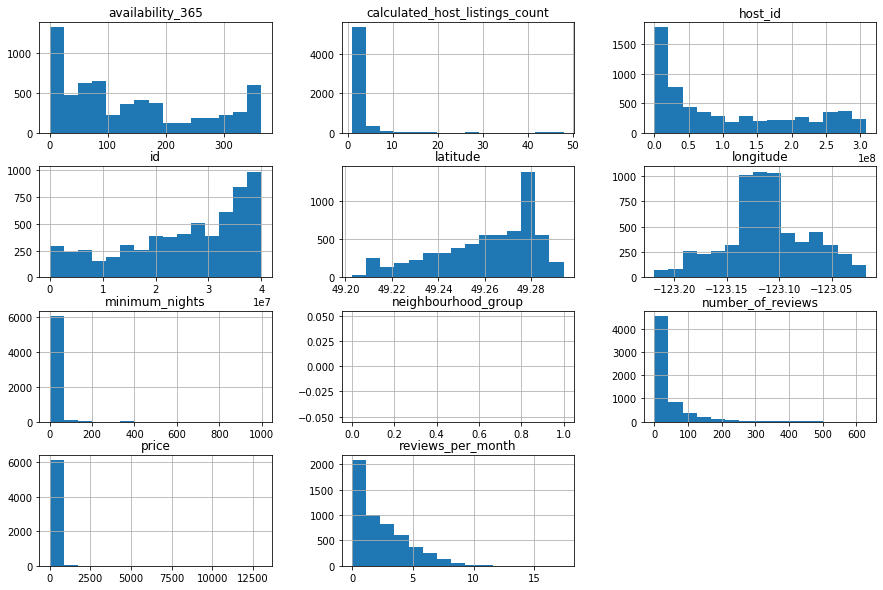

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15 , figsize=(15,10));


### **Q4 - Há *outliers* presentes ?**
Pela distribuição do histograma é possíveis identificar a presença de *outliers*. Observe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição e distorcem toda a representação gráfica. 

* Para confirmar a presença de outliers, usaremos o resumo estatístico.

In [0]:
# ver resumo estatístico das variáveis numéricas
df[['price','minimum_nights','number_of_reviews','neighbourhood_group',
     'calculated_host_listings_count']].describe()

,price,minimum_nights,number_of_reviews,neighbourhood_group,calculated_host_listings_count
count,6181.000000,6181.000000,6181.000000,0.0,6181.000000
mean,180.013914,11.721243,35.765410,NaN,3.374697
std,306.978613,29.570367,55.294712,NaN,6.460788
min,15.000000,1.000000,0.000000,NaN,1.000000
25%,85.000000,1.000000,3.000000,NaN,1.000000
50%,129.000000,2.000000,15.000000,NaN,1.000000
75%,199.000000,14.000000,45.000000,NaN,3.000000
max,13000.000000,998.000000,628.000000,NaN,48.000000


Outliers:
* **price** -  Pode- se afirmar que o Histograma está distorcido por conta do valor máximo de CAD 13.000, visto que 75% dos valores estão abaixo de CAD 199. Isso fica evidente com o desvio padrão de CAD 306.
* **minimum_nights** - Novamente o valor máximo distorce da mesma maneira do que no preço. Por ter um valor de noites mínimas bem maior que um ano de hospedágem.
* **number_of_reviews**- Segue o mesmo padrão dos constatados acima.
* **calculated_host_listngs_count** - Segue o mesmo padrão dos constatados acima.

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

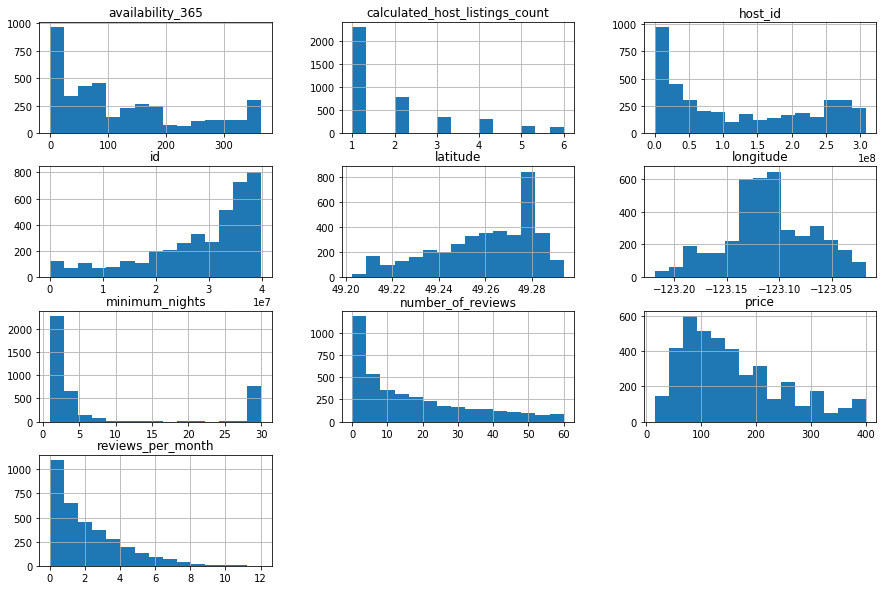

In [6]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 400].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 60].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 6].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5 - Qual a correlação existente entre as variáveis**
A correlação significa que existe uma relação direta entre duas coisas. No caso estamos procuram correlação entre duas variáveis do DataFrame.
Essa relação pode ser medida, sendo função do coeficiente de relação estabelecer a intensidade dela. Nesse sentido, para identificar as relações serão utilizadas duas ferramentas:
* Matriz de Correlação 
* Mapa de Calor a partir da matriz

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews','reviews_per_month',
                 'calculated_host_listings_count','availability_365']].corr()


# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.121267,-0.048583,0.004949,-0.205034,0.022507
minimum_nights,-0.121267,1.000000,-0.156751,-0.367781,0.004637,0.168015
number_of_reviews,-0.048583,-0.156751,1.000000,0.369884,-0.096954,0.021463
reviews_per_month,0.004949,-0.367781,0.369884,1.000000,-0.089498,0.008772
calculated_host_listings_count,-0.205034,0.004637,-0.096954,-0.089498,1.000000,0.146343
availability_365,0.022507,0.168015,0.021463,0.008772,0.146343,1.000000


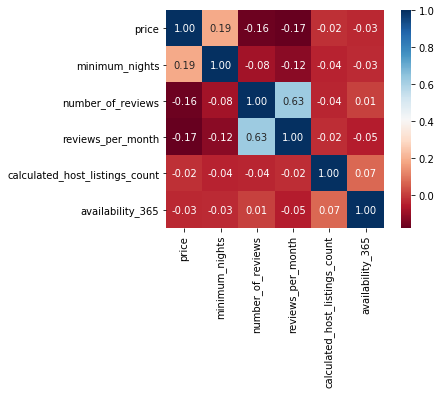

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt = '.2f', square = True, linecolor = 'white', annot= True);

### **Q6 - Qual a média dos preços de aluguel?**
 Com a base de dados mais limpa podemos descubrir valores mais proóximos da realidade , um deles sendo a média de preços da diária de hospedágens no Airbnb em Vancouver.

In [7]:
# ver a média da coluna `price``
print(" A média da diária é: {}".format(df_clean["price"].mean()))


 A média da diária é: 154.67684605757196


###**Q7. Qual o tipo de imóvel mais alugado no Airbnb?**
 Se você já utilizou o Airbnb, sabe que existem diversas opções de tipos de acomodações: casa/ apartamentos inteiros , um quarto individual ou até mesmo quarto compartilhado.
 
 Pela variável `room_type`, podemos descobrir qual tipo de quarto é mais alugado.







In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()

Entire home/apt    2794
Private room       1155
Shared room          29
Hotel room           17
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()/ df_clean.shape[0]

Entire home/apt    0.699374
Private room       0.289111
Shared room        0.007259
Hotel room         0.004255
Name: room_type, dtype: float64

#####**Observa-se que :** 
* **69.9%dos imóveis são casas ou apartamentos inteiros**
* 28.9% dos imóveis são quartos individuais 
* 0,7% dos imóveis são quartos compartilhados

### **Q8 - Qual a localidade mais cara do dataset?**



In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:20]

neighbourhood
Downtown Eastside           196.965686
Downtown                    194.983376
Mount Pleasant              175.564444
West End                    166.914062
Kitsilano                   163.959732
Fairview                    161.943820
Grandview-Woodland          149.259067
Shaughnessy                 147.728814
Arbutus Ridge               147.112676
West Point Grey             145.188235
Dunbar Southlands           144.574074
South Cambie                143.539683
Strathcona                  137.947368
Riley Park                  135.213043
Sunset                      135.140000
Kerrisdale                  130.819672
Marpole                     127.059880
Oakridge                    126.870588
Kensington-Cedar Cottage    126.094276
Hastings-Sunrise            121.734694
Name: price, dtype: float64

* Acima, vemos que Downtown Eastside é a localização mais valorizada, entretanto é uma zona que fica bem próximo da Hastings Street uma rua conhecida pela grande quantidadede de usuários de drogas. Algo de não atrai turistas pelo contrário somente repele. Então, porque é zona mais cara ?

In [9]:
# ver quantas entradas há em Downtown Eastside 
print(df[df.neighbourhood == "Downtown Eastside"].shape)

#ver as  entradas de Downtown Eastside
df[df.neighbourhood == "Downtown Eastside"].head()

(341, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,13357,! Wow! 2bed 2bath 1bed den Harbour View Apartm...,52118,Liliana,NaN,Downtown Eastside,49.27955,-123.10546,Entire home/apt,152,30,57,2019-06-30,0.48,3,316
21,32746,Designer Urban Park View Townhouse,52118,Liliana,NaN,Downtown Eastside,49.28034,-123.10415,Private room,107,30,80,2019-01-06,0.71,3,343
28,70453,"Open-concept, Modern Heritage Home with over 2...",56709,Samantha Jo,NaN,Downtown Eastside,49.27947,-123.08752,Entire home/apt,300,3,19,2019-09-02,0.36,1,10
46,174135,VANCOUVER'S BEST PRIVATE SUITE/LOFT,831892,Hollie,NaN,Downtown Eastside,49.27782,-123.08985,Entire home/apt,100,30,116,2018-04-04,1.17,1,168
49,200643,This is the door to Vancouver USW,981145,Dianne,NaN,Downtown Eastside,49.27384,-123.08289,Private room,87,1,136,2019-08-11,1.57,4,39


In [0]:
df_clean.loc[df_clean["neighbourhood"]== "Downtown Eastside"].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.900000e+02,1.900000e+02,190.000000,190.000000,190.000000,190.000000,190.000000,173.000000,190.000000,190.000000
mean,2.878757e+07,1.110892e+08,49.281023,-123.099844,182.357895,5.621053,19.678947,2.658960,1.531579,121.647368
std,1.014530e+07,1.114681e+08,0.001993,0.008658,74.484531,9.255548,17.406350,2.289288,0.974029,115.268157
min,1.335700e+04,5.211800e+04,49.275950,-123.112710,44.000000,1.000000,0.000000,0.080000,1.000000,0.000000
25%,2.360301e+07,1.016965e+07,49.279645,-123.105823,125.500000,1.000000,5.000000,0.840000,1.000000,20.000000
50%,3.231012e+07,5.408224e+07,49.280820,-123.102495,180.000000,2.000000,15.000000,1.890000,1.000000,85.000000
75%,3.669465e+07,2.266273e+08,49.282755,-123.098158,229.500000,3.000000,31.750000,4.090000,2.000000,173.000000
max,3.997338e+07,3.077009e+08,49.284780,-123.078540,350.000000,30.000000,59.000000,10.870000,6.000000,365.000000


* Pelo número de entradas e o resumo estatístico percebe-se que os dados não são outliers.
* Gastown é um bairro bem famoso e turístico na cidade e fica também no lado oeste da cidade. Vamos verifica se sua presença no DataSet: 

In [12]:
df_clean.loc[df_clean["neighbourhood"]=="Gastown"].shape

(0, 15)

Percebe-se que temos 0 entrads para Gastown. Assim, fica evidente que o bairro (turístico e bem valorizado) está incluido no *Downtown Eastside*. Isso fica evidente quando pesquisamos "Downtown Vancouver Eastside" no Airbnb.

###**Q9 - Onde está a a maior concentração de imóveis do Airbnb em Vancouver ?**
O *DataFrame* possui a latitude e longitude dos imóveis, assim podemos plotar um gráfico/mapa para observar onde se encontra a maior parte dos imóveis.


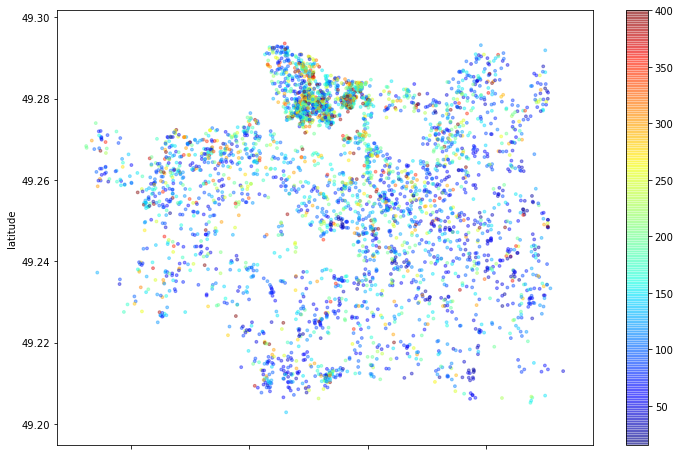

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.4, c= df_clean["price"],s=8
              ,cmap=plt.get_cmap("jet"),figsize=(12,8));

* Fica claro que a maior parte dos imóveis está concentrado no Centro da cidade muito por conta de vários pontos turísticos ficarem perto, pela conexão do transporte público a área e o acesso a facilidadades. Mesmo assim, existe uma dispersão bem grande dos imóveis para aluguel pela cidade.

### **Q10 - Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [14]:
# ver a média da coluna `minimum_nights``
print('A média de noites mínimas em um Airbnb em Vancouver é: {:.2} noites'.format(df_clean['minimum_nights'].mean()))

A média de noites mínimas em um Airbnb em Vancouver é: 7.7 noites


## Conclusões


Torna-se evidente, portanto, que Vancouver é uma ciadade que atrai mais turístas para o centro. Isso fica evidente pelo mapa de localização (concentração) de imóveis e pelos preços praticados nos bairros que pertencem a essa localidade. 

Podemos pontuar algumas outras observações interessantes, como a média de noites mínimas (7.7) e a média de preços praticados (154). Quase 70% das acomodações são quartos ou apartamentos inteiros.

É importante ressantar que o DataSet trabalhado é uma versão resumida, ideal para uma análise inicial e possui alguns outliers que distorcem dados. Nesse sentido, para uma próxima análise exploratória, recomenda-se trabalhar com um DataSet mais detalhado fornecido no mesmo site com mais atributos disponíveis.